In [362]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)

In [343]:
df = pd.read_csv('./training.csv')

# change years to year playoffs occured
df['Year'] = [int(x[:-3])+1 for x in df.loc[:, 'Year']]
# keep years that have shooting csv
df = df[df['Year'] > 1999]
# drop non-team data
df = df[~df['Team'].isin(
    ['Southeast Division', 'Northwest Division', 'Southwest Division', 'League Average'])]
df.drop(['Unnamed: 0', 'Rk'], inplace=True, axis=1)
df['W/L%'] = df['W/L%'].astype('float')
df.reset_index(drop=True, inplace=True)

In [344]:
cols_to_use = [0,49,55,122]
cols_to_use.extend(range(57,64))
cols_to_use.extend(range(75,120))
cols_to_use.extend(range(134, 161))
show_list(df)

0 - Team
1 - G
2 - MP
3 - FG
4 - FGA
5 - FG%
6 - 3P
7 - 3PA
8 - 3P%
9 - 2P
10 - 2PA
11 - 2P%
12 - FT
13 - FTA
14 - FT%
15 - ORB
16 - DRB
17 - TRB
18 - AST
19 - STL
20 - BLK
21 - TOV
22 - PF
23 - PTS
24 - Rk_szn_totals_against
25 - G_szn_totals_against
26 - MP_szn_totals_against
27 - FG_szn_totals_against
28 - FGA_szn_totals_against
29 - FG%_szn_totals_against
30 - 3P_szn_totals_against
31 - 3PA_szn_totals_against
32 - 3P%_szn_totals_against
33 - 2P_szn_totals_against
34 - 2PA_szn_totals_against
35 - 2P%_szn_totals_against
36 - FT_szn_totals_against
37 - FTA_szn_totals_against
38 - FT%_szn_totals_against
39 - ORB_szn_totals_against
40 - DRB_szn_totals_against
41 - TRB_szn_totals_against
42 - AST_szn_totals_against
43 - STL_szn_totals_against
44 - BLK_szn_totals_against
45 - TOV_szn_totals_against
46 - PF_szn_totals_against
47 - PTS_szn_totals_against
48 - Rk_advanced
49 - Age
50 - W
51 - L
52 - PW
53 - PL
54 - MOV
55 - SOS
56 - SRS
57 - ORtg
58 - DRtg
59 - NRtg
60 - Pace
61 - FTr
62 - 3

In [345]:
sorted_cols = sorted(cols_to_use)
sorted_cols.insert(1, 129)
sorted_cols
modeling = df[df.columns[sorted_cols]].sort_values(by=['Year','Team']).reset_index(drop=True)
modeling

,Team,Year,Age,SOS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,...,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,%FGA_shooting_against,Md._shooting_against,%3PA_shooting_against,3P%_shooting_against
0,Atlanta Hawks,2000,27.6,-0.04,102.0,107.9,-5.9,91.7,0.292,0.120,...,0.856,0.185,0.176,0.287,0.208,0.144,0.052,313.0,0.244,0.407
1,Boston Celtics,2000,25.4,-0.24,104.8,105.6,-0.8,94.6,0.316,0.183,...,0.842,0.225,0.194,0.180,0.242,0.158,0.054,326.0,0.244,0.383
2,Charlotte Hornets,2000,28.7,-0.34,104.3,101.4,2.9,93.9,0.376,0.153,...,0.841,0.184,0.166,0.274,0.216,0.159,0.043,266.0,0.243,0.405
3,Chicago Bulls,2000,26.0,0.17,94.2,104.6,-10.4,89.4,0.338,0.167,...,0.836,0.199,0.148,0.247,0.241,0.164,0.050,293.0,0.211,0.421
4,Cleveland Cavaliers,2000,27.2,-0.14,100.4,104.0,-3.6,95.7,0.327,0.136,...,0.818,0.231,0.155,0.203,0.229,0.182,0.044,281.0,0.234,0.354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Sacramento Kings,2023,25.4,-0.35,119.4,116.8,2.6,100.3,0.284,0.423,...,0.624,0.242,0.221,0.093,0.068,0.376,0.053,350.0,0.262,0.396
711,San Antonio Spurs,2023,23.9,0.22,110.2,120.0,-9.8,101.6,0.229,0.348,...,0.645,0.279,0.205,0.097,0.065,0.355,0.073,481.0,0.217,0.447
712,Toronto Raptors,2023,25.8,0.12,115.5,114.0,1.5,97.1,0.257,0.351,...,0.604,0.261,0.201,0.090,0.052,0.396,0.071,432.0,0.289,0.395
713,Utah Jazz,2023,26.5,-0.09,115.8,116.7,-0.9,100.5,0.265,0.421,...,0.623,0.213,0.259,0.090,0.061,0.377,0.064,418.0,0.209,0.401


In [346]:
name_mapping = {'New Orleans/Oklahoma City Hornets': 'New Orleans Pelicans',
                'Vancouver Grizzlies': 'Memphis Grizzlies',
                'New Jersey Nets': 'Brooklyn Nets',
                'Seattle SuperSonics': 'Oklahoma City Thunder',
                'New Orleans Hornets': 'New Orleans Pelicans',
                'Charlotte Bobcats': 'Charlotte Hornets',
                '': ''
                }


def rename(df):
    df['Team'] = df['Team'].map(name_mapping).fillna(df['Team'])
    return df

In [1138]:
target = pd.read_csv('./validation.csv')
target = target[target['Year']>1999]
modeling, target = rename(modeling), rename(target)
full = pd.merge(modeling, target, on=['Year','Team'])
full['Round Finished'] = full['Round Finished'].astype('category').map({-1:0}).fillna(full['Round Finished'])
full['Synthetic'] = False
full

,Team,Year,Age,SOS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,FG_szn_per100poss,FGA_szn_per100poss,FG%_szn_per100poss,3P_szn_per100poss,3PA_szn_per100poss,3P%_szn_per100poss,2P_szn_per100poss,2PA_szn_per100poss,2P%_szn_per100poss,FT_szn_per100poss,FTA_szn_per100poss,FT%_szn_per100poss,ORB_szn_per100poss,DRB_szn_per100poss,...,10-16,16-3P,3P_shooting,%FGA,Md.,%3PA,3P%_shooting,Att.,Rk_shooting_against,G_shooting_against,MP_shooting_against,FG%_shooting_against,Dist._shooting_against,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,%FGA_shooting_against,Md._shooting_against,%3PA_shooting_against,3P%_shooting_against,Round Finished,Synthetic
0,Atlanta Hawks,2000,27.6,-0.04,102.0,107.9,-5.9,91.7,0.292,0.120,0.503,39.6,89.8,0.441,3.4,10.7,0.317,36.2,79.1,0.458,19.5,26.2,0.743,15.1,33.9,...,0.228,0.228,0.120,0.038,236.0,0.128,0.452,11.0,1.0,82.0,19830.0,0.455,12.4,0.856,0.185,0.176,0.287,0.208,0.144,0.052,313.0,0.244,0.407,0.0,False
1,Boston Celtics,2000,25.4,-0.24,104.8,105.6,-0.8,94.6,0.316,0.183,0.520,39.3,88.5,0.444,5.4,16.2,0.331,33.9,72.3,0.469,20.8,28.0,0.745,14.2,31.1,...,0.138,0.190,0.183,0.029,188.0,0.252,0.349,4.0,2.0,82.0,19730.0,0.470,12.1,0.842,0.225,0.194,0.180,0.242,0.158,0.054,326.0,0.244,0.383,0.0,False
2,Charlotte Hornets,2000,28.7,-0.34,104.3,101.4,2.9,93.9,0.376,0.153,0.530,37.9,84.4,0.449,4.4,12.9,0.339,33.5,71.5,0.469,24.1,31.8,0.758,11.4,34.0,...,0.190,0.212,0.153,0.056,340.0,0.179,0.335,4.0,3.0,82.0,19780.0,0.448,12.7,0.841,0.184,0.166,0.274,0.216,0.159,0.043,266.0,0.243,0.405,1.0,False
3,Chicago Bulls,2000,26.0,0.17,94.2,104.6,-10.4,89.4,0.338,0.167,0.490,34.8,83.7,0.415,4.6,14.0,0.329,30.1,69.7,0.432,20.1,28.3,0.709,14.0,31.5,...,0.145,0.225,0.167,0.040,220.0,0.154,0.308,6.0,4.0,82.0,19805.0,0.456,13.0,0.836,0.199,0.148,0.247,0.241,0.164,0.050,293.0,0.211,0.421,0.0,False
4,Cleveland Cavaliers,2000,27.2,-0.14,100.4,104.0,-3.6,95.7,0.327,0.136,0.516,37.6,85.1,0.442,4.3,11.6,0.373,33.3,73.4,0.453,20.9,27.9,0.750,12.8,31.6,...,0.161,0.235,0.136,0.047,291.0,0.205,0.410,5.0,5.0,82.0,19855.0,0.443,12.5,0.818,0.231,0.155,0.203,0.229,0.182,0.044,281.0,0.234,0.354,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,Sacramento Kings,2023,25.4,-0.35,119.4,116.8,2.6,100.3,0.284,0.423,0.608,43.1,87.3,0.494,13.6,36.9,0.369,29.5,50.3,0.586,19.6,24.8,0.790,9.4,32.6,...,0.080,0.050,0.423,0.060,390.0,0.229,0.397,9.0,26.0,82.0,19830.0,0.492,13.7,0.624,0.242,0.221,0.093,0.068,0.376,0.053,350.0,0.262,0.396,1.0,False
711,San Antonio Spurs,2023,23.9,0.22,110.2,120.0,-9.8,101.6,0.229,0.348,0.554,42.0,90.3,0.465,10.8,31.4,0.345,31.2,58.9,0.529,15.4,20.7,0.743,11.5,31.1,...,0.112,0.053,0.348,0.040,265.0,0.216,0.367,18.0,27.0,82.0,19855.0,0.507,13.2,0.645,0.279,0.205,0.097,0.065,0.355,0.073,481.0,0.217,0.447,0.0,False
712,Toronto Raptors,2023,25.8,0.12,115.5,114.0,1.5,97.1,0.257,0.351,0.555,42.9,93.5,0.459,11.0,32.8,0.335,31.9,60.7,0.525,18.8,24.0,0.784,13.0,31.0,...,0.097,0.085,0.351,0.065,436.0,0.267,0.363,22.0,28.0,82.0,19805.0,0.491,13.9,0.604,0.261,0.201,0.090,0.052,0.396,0.071,432.0,0.289,0.395,0.0,False
713,Utah Jazz,2023,26.5,-0.09,115.8,116.7,-0.9,100.5,0.265,0.421,0.584,42.0,88.8,0.473,13.2,37.4,0.353,28.8,51.4,0.560,18.5,23.6,0.786,11.7,33.7,...,0.073,0.037,0.421,0.071,460.0,0.220,0.413,16.0,29.0,82.0,19805.0,0.473,13.9,0.623,0.213,0.259,0.090,0.061,0.377,0.064,418.0,0.209,0.401,0.0,False


In [500]:
def add_noise(x):
    if isinstance(x, float):
        noise = np.random.normal(x, abs(0.02 * x))  # Sample noise from a normal distribution with mean=x and std=0.1*x
        return round(noise, 3)
    else:
        return x

# Apply noise to each entry in the DataFrame
# noisy_df = df.applymap(add_noise)

In [711]:
dfs = []
for placement in full['Round Finished'].unique():
    temp = full[full['Round Finished'] == placement].copy()
    temp['Synthetic'] = False
    temp2 = temp.sample(331-len(temp), replace=True, random_state=42)
    noisy = temp2.applymap(add_noise).copy()
    print(len(temp), len(noisy))
    noisy['Synthetic'] = True
    dfs.append(temp)
    dfs.append(noisy)
combined = pd.concat(dfs, ignore_index=True, copy=True).sort_values(
    by=['Year', 'Team'], ignore_index=True)
combined['Round Finished'] = combined['Round Finished'].map({-1:0}).fillna(combined['Round Finished'])
combined['Round Finished']

331 0
192 139
24 307
24 307
96 235
48 283


0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
1981    1.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
Name: Round Finished, Length: 1986, dtype: float64

In [1402]:
import torch
import torch.nn as nn
import torch.optim as optim


class FeedforwardNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, hidden_functions, output_size):
        super(FeedforwardNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size
        self.functions = hidden_functions
        self.criterion = torch.nn.CrossEntropyLoss()

        # Creates layers
        self.layers = nn.ModuleList()
        prev_size = self.input_size
        for i, size in enumerate(hidden_sizes):
            self.layers.append(nn.Linear(prev_size, size))
            if hidden_functions[i] is not None:
                self.layers.append(hidden_functions[i])
            prev_size = size
        self.layers.append(nn.Linear(prev_size, output_size))

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

    def fit(self, X, y, learning_rate, epochs, p=True):
        # Ensure dtypes are usable
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.long)

        # Define loss and optimizer
        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)

        for epoch in range(epochs):
            # Forward propagation
            output = self.forward(X)

            # Calculate loss
            loss = self.criterion(output, y)

            # Backpropagation
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            # Print the loss every 100 epochs
            if(p):
                if epoch % epochs/10 == epochs/10-1:
                    print(f"Epoch {epoch+1}: Loss = {loss.item():.8f}")
        return round(loss.item(), 5)

    def predict_proba(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        output = self.forward(X)
        probabilities = nn.functional.softmax(output, dim=1)
        return probabilities.detach().numpy()

    def predict(self, X):
        X = torch.tensor(X, dtype=torch.float32)
        output = self.forward(X)
        _, predicted_classes = torch.max(output, dim=1)
        return predicted_classes.detach().numpy()

    def check_CE_loss(self, X, y):
        probabilities = self.predict_proba(X)
        loss = self.criterion(probabilities, y)
        loss.backward()
        return round(loss.item(), 5)

    def check_accuracy(self, X, y):
        classes = self.predict(X)
        check = classes == y
        missed = sum(check)
        length = len(check)
        print(f"{missed}/{length}")
        return missed/length

In [1403]:
def KFold(df, folds=5, window_size=10, learning_rate=0.01, epochs=100):
    losses = []
    for year in range(2022, 2022-folds, -1):
        train = df[(df['Year'] < year) & (df['Year'] >= year-window_size)]
        val = df[(df['Year'] == year) & (df['Synthetic'] == True)]

        X_train = train.drop(
            ['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1).values
        Y_train = train['Round Finished'].values

        X_val = val.drop(['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1)
        Y_val = val['Round Finished']

        X_val = torch.tensor(X_val.values, dtype=torch.float64)
        Y_val = torch.tensor(Y_val.values, dtype=torch.int64)
        # funcs: F.relu, torch.sigmoid, torch.matmul

        model = FeedforwardNetwork(X_train.shape[1], hidden_sizes=[60],
                           hidden_functions=[nn.ReLU()],
                           output_size=6)
        # Train the model
        losses.append(model.fit(X_train, Y_train, learning_rate, epochs, False))
    return round(np.mean(losses), 4), model

In [1404]:
loss, model = KFold(full, learning_rate=0.1, epochs=100,
                    folds=5, window_size=10)
loss

1.4097

In [1408]:
X_test = combined[(combined['Year']==2023) & (combined['Synthetic']==False)].drop(
            ['Team', 'Year', 'Round Finished', 'Synthetic'], axis=1)
Y_test = combined[(combined['Year']==2023) & (combined['Synthetic']==False)]['Round Finished']
X_test

,Age,SOS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,FG_szn_per100poss,FGA_szn_per100poss,FG%_szn_per100poss,3P_szn_per100poss,3PA_szn_per100poss,3P%_szn_per100poss,2P_szn_per100poss,2PA_szn_per100poss,2P%_szn_per100poss,FT_szn_per100poss,FTA_szn_per100poss,FT%_szn_per100poss,ORB_szn_per100poss,DRB_szn_per100poss,TRB_szn_per100poss,AST_szn_per100poss,...,0-3,3-10,10-16,16-3P,3P_shooting,%FGA,Md.,%3PA,3P%_shooting,Att.,Rk_shooting_against,G_shooting_against,MP_shooting_against,FG%_shooting_against,Dist._shooting_against,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,%FGA_shooting_against,Md._shooting_against,%3PA_shooting_against,3P%_shooting_against
1895,24.9,0.02,116.6,116.3,0.3,100.7,0.244,0.331,0.579,43.9,90.9,0.483,10.6,30.1,0.352,33.3,60.9,0.548,18.2,22.2,0.818,11.0,32.6,43.7,24.6,...,0.254,0.188,0.135,0.092,0.331,0.065,455.0,0.267,0.362,8.0,1.0,82.0,19855.0,0.486,13.2,0.629,0.298,0.173,0.099,0.059,0.371,0.071,476.0,0.246,0.384
1896,27.4,-0.15,118.0,111.5,6.5,98.5,0.243,0.480,0.600,42.2,88.8,0.475,16.0,42.6,0.377,26.2,46.2,0.567,17.5,21.6,0.812,9.7,35.6,45.3,26.7,...,0.214,0.194,0.065,0.048,0.480,0.051,337.0,0.224,0.402,12.0,2.0,82.0,19980.0,0.463,14.4,0.626,0.199,0.231,0.110,0.086,0.374,0.051,346.0,0.187,0.360
1902,28.0,0.18,115.0,114.1,0.9,98.3,0.260,0.397,0.598,42.0,86.3,0.487,13.0,34.3,0.378,29.1,52.0,0.559,17.9,22.4,0.800,8.3,32.8,41.1,25.9,...,0.222,0.177,0.122,0.082,0.397,0.059,373.0,0.243,0.392,6.0,3.0,82.0,19730.0,0.463,13.3,0.636,0.267,0.212,0.093,0.064,0.364,0.056,377.0,0.249,0.406
1903,25.3,0.35,109.2,115.3,-6.1,100.8,0.261,0.360,0.550,40.6,89.0,0.457,10.6,32.0,0.330,30.1,56.9,0.528,17.4,23.2,0.749,10.8,33.0,43.8,24.7,...,0.287,0.208,0.087,0.058,0.360,0.073,482.0,0.261,0.354,10.0,5.0,82.0,19830.0,0.477,13.6,0.620,0.280,0.188,0.088,0.063,0.380,0.065,408.0,0.253,0.405
1904,27.5,0.07,113.5,112.2,1.3,98.5,0.251,0.333,0.587,42.7,87.1,0.490,10.4,29.0,0.361,32.2,58.1,0.555,17.7,21.9,0.809,8.5,34.0,42.5,24.5,...,0.281,0.146,0.116,0.125,0.333,0.054,329.0,0.262,0.397,4.0,4.0,82.0,19905.0,0.468,14.4,0.574,0.273,0.162,0.080,0.059,0.426,0.060,394.0,0.255,0.346
1905,25.4,-0.15,116.1,110.6,5.5,95.7,0.264,0.371,0.590,43.0,88.1,0.488,12.0,32.7,0.367,31.0,55.4,0.559,18.2,23.3,0.780,10.0,32.5,42.5,25.8,...,0.282,0.198,0.094,0.055,0.371,0.085,543.0,0.241,0.367,12.0,6.0,82.0,19880.0,0.468,13.6,0.634,0.276,0.184,0.110,0.064,0.366,0.058,348.0,0.264,0.408
1906,27.8,-0.22,116.8,116.7,0.1,96.6,0.298,0.487,0.599,40.9,86.2,0.475,15.5,41.9,0.371,25.4,44.2,0.574,19.4,25.7,0.755,7.8,31.9,39.7,23.4,...,0.218,0.169,0.080,0.046,0.487,0.050,304.0,0.271,0.403,26.0,7.0,82.0,19930.0,0.485,13.5,0.633,0.250,0.206,0.109,0.067,0.367,0.054,347.0,0.260,0.379
1907,26.6,-0.29,117.6,114.2,3.4,98.1,0.259,0.361,0.601,44.2,87.8,0.504,12.0,31.7,0.379,32.3,56.1,0.575,17.1,22.7,0.751,10.3,33.4,43.7,29.3,...,0.262,0.216,0.083,0.078,0.361,0.081,518.0,0.255,0.400,27.0,8.0,82.0,19755.0,0.478,13.7,0.622,0.231,0.240,0.091,0.061,0.378,0.058,388.0,0.256,0.358
1923,24.1,0.49,110.7,118.9,-8.2,99.0,0.295,0.372,0.561,39.7,87.4,0.454,11.4,32.5,0.351,28.3,54.8,0.516,19.9,25.8,0.771,11.2,31.4,42.6,23.1,...,0.220,0.227,0.112,0.069,0.372,0.061,404.0,0.266,0.373,13.0,9.0,82.0,19805.0,0.489,13.6,0.622,0.245,0.234,0.083,0.060,0.378,0.068,439.0,0.255,0.387
1924,27.3,-0.15,116.1,114.4,1.7,101.6,0.224,0.479,0.600,42.1,88.0,0.479,16.2,42.2,0.385,25.9,45.9,0.564,15.6,19.7,0.794,10.3,33.3,43.6,29.1,...,0.177,0.210,0.069,0.065,0.479,0.056,374.0,0.199,0.395,23.0,10.0,82.0,19830.0,0.469,14.5,0.607,0.163,0.280,0.094,0.069,0.393,0.053,357.0,0.234,0.372


tensor([1, 3, 1, 0, 0, 1, 0, 5, 0, 2, 0, 0, 1, 3, 1, 4, 1, 1, 0, 2, 0, 0, 2, 2,
        0, 1, 0, 0, 0, 0])

In [1401]:
model.predict_proba(X_val)

/var/folders/dc/vmrx_nc16tz65xmfmz0x56kh0000gn/T/ipykernel_16823/338099748.py:57: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


tensor([[ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4502, -0.6878, -0.6924],
        [ 1.2188,  0.5828, -0.0129, -0.4

In [1241]:
losses = []
for i, data in enumerate([full, combined]):
    for windows in range(3, 18):
        for lr in [0.1, 0.01]:
            for epochs in [50, 100]:
                params = [i, windows, lr, epochs]
                loss = KFold(data, learning_rate=lr, epochs=epochs, window_size=windows)[0]
                params += ([loss])
                losses.append(params)

In [1244]:
list(losses)

[array([  0.    ,  15.    ,   0.1   , 100.    ,   1.4081]),
 array([  0.    ,   7.    ,   0.1   , 100.    ,   1.4085]),
 array([  0.    ,   3.    ,   0.1   , 100.    ,   1.4087]),
 array([  0.    ,   6.    ,   0.1   , 100.    ,   1.4091]),
 array([  0.    ,   9.    ,   0.1   , 100.    ,   1.4092]),
 array([  0.    ,  13.    ,   0.1   , 100.    ,   1.4094]),
 array([  0.    ,   8.    ,   0.1   , 100.    ,   1.4096]),
 array([  0.    ,  10.    ,   0.1   , 100.    ,   1.4097]),
 array([  0.    ,  11.    ,   0.1   , 100.    ,   1.4098]),
 array([  0.    ,  14.    ,   0.1   , 100.    ,   1.4098]),
 array([  0.    ,  12.    ,   0.1   , 100.    ,   1.4102]),
 array([  0.    ,   5.    ,   0.1   , 100.    ,   1.4103]),
 array([  0.    ,   4.    ,   0.1   , 100.    ,   1.4106]),
 array([  0.    ,  16.    ,   0.1   , 100.    ,   1.4108]),
 array([  0.   ,  17.   ,   0.1  , 100.   ,   1.412]),
 array([ 0.    , 16.    ,  0.1   , 50.    ,  1.4602]),
 array([ 0.    ,  5.    ,  0.1   , 50.    ,  1.460

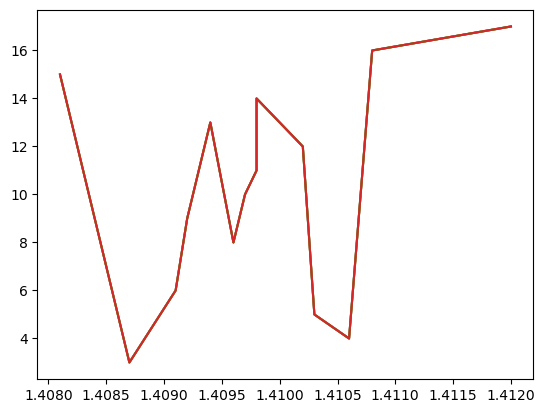

In [1383]:
losses = np.array(losses)
losses = losses[losses[:, 4].argsort()]
for i in range(4):
    plt.plot(losses[:15,4], losses[:15,1])

In [1178]:
KFold()

/var/folders/dc/vmrx_nc16tz65xmfmz0x56kh0000gn/T/ipykernel_16823/3068492194.py:61: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [761]:
import pandas as pd

def drop_highly_correlated_columns(df, threshold=0.9):
    # Compute the correlation matrix
    corr_matrix = df.corr().abs()

    # Create a mask to identify highly correlated columns
    mask = corr_matrix >= threshold

    # Exclude diagonal and lower triangle of the correlation matrix
    mask = mask.mask(np.triu(np.ones(mask.shape, dtype=bool), k=1))

    # Get the names of highly correlated columns
    drop_cols = [column for column in mask.columns if any(mask[column])]

    # Drop the highly correlated columns from the DataFrame
    df_filtered = df.drop(columns=drop_cols)

    return df_filtered


In [783]:
testing = combined.copy()
mask = testing.corr().abs() >= 0.8
mask = mask.mask(np.triu(np.ones(mask.shape, dtype=bool), k=1))
drop_cols = [mask[column].sum() for column in mask.columns if any(mask[column])]
drop_cols

[14,
 1,
 1,
 2,
 3,
 2,
 1,
 4,
 14,
 2,
 1,
 1,
 1,
 13,
 12,
 1,
 4,
 6,
 1,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 4,
 3,
 1,
 1,
 2,
 11,
 9,
 1,
 4,
 4,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 6,
 1,
 1,
 1,
 5,
 4,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1]

In [1319]:
combined.corr().abs()

,Year,Age,SOS,ORtg,DRtg,NRtg,Pace,FTr,3PAr,TS%,FG_szn_per100poss,FGA_szn_per100poss,FG%_szn_per100poss,3P_szn_per100poss,3PA_szn_per100poss,3P%_szn_per100poss,2P_szn_per100poss,2PA_szn_per100poss,2P%_szn_per100poss,FT_szn_per100poss,FTA_szn_per100poss,FT%_szn_per100poss,ORB_szn_per100poss,DRB_szn_per100poss,TRB_szn_per100poss,...,10-16,16-3P,3P_shooting,%FGA,Md.,%3PA,3P%_shooting,Att.,Rk_shooting_against,G_shooting_against,MP_shooting_against,FG%_shooting_against,Dist._shooting_against,2P_shooting_against,0-3_shooting_against,3-10_shooting_against,10-16_shooting_against,16-3P_shooting_against,3P_shooting_against,%FGA_shooting_against,Md._shooting_against,%3PA_shooting_against,3P%_shooting_against,Round Finished,Synthetic
Year,1.000000,0.220887,0.037873,0.580567,0.614300,0.042902,0.689879,0.618019,0.850990,0.637433,0.441884,0.114399,0.374319,0.834373,0.854916,0.212756,0.673980,0.816078,0.731294,0.575104,0.649432,0.349532,0.658416,0.322516,0.293364,...,0.563618,0.788950,0.851374,0.209055,0.241439,0.142334,0.108765,0.239743,0.036108,0.267653,0.271442,0.429994,0.661401,0.911959,0.055747,0.395220,0.716635,0.881789,0.920120,0.518481,0.546472,0.167507,0.067539,0.032125,0.028692
Age,0.220887,1.000000,0.107704,0.086270,0.297898,0.402131,0.208836,0.133104,0.078476,0.123923,0.075034,0.176582,0.216332,0.057859,0.096482,0.182684,0.122657,0.037775,0.081516,0.101221,0.107287,0.044492,0.107823,0.175381,0.042806,...,0.163062,0.153960,0.079316,0.122648,0.130989,0.264636,0.169504,0.166075,0.022877,0.107675,0.091697,0.273600,0.026428,0.203086,0.244928,0.044826,0.341754,0.182305,0.199028,0.337979,0.296087,0.076722,0.144614,0.409535,0.297668
SOS,0.037873,0.107704,1.000000,0.047808,0.263466,0.340839,0.083022,0.067848,0.016515,0.080018,0.014300,0.096094,0.047782,0.034063,0.011004,0.133182,0.048123,0.032028,0.030092,0.070413,0.051309,0.012399,0.062217,0.205770,0.118280,...,0.120203,0.006751,0.016405,0.007486,0.005275,0.085090,0.125653,0.118363,0.183610,0.081123,0.083037,0.273782,0.048785,0.018203,0.048196,0.108589,0.114032,0.043854,0.023336,0.264495,0.241393,0.049717,0.085122,0.314410,0.251817
ORtg,0.580567,0.086270,0.047808,1.000000,0.439426,0.467989,0.509105,0.284658,0.659077,0.799908,0.702387,0.054487,0.657952,0.704015,0.660641,0.510244,0.371325,0.635138,0.769609,0.193771,0.298782,0.325160,0.462509,0.316357,0.151464,...,0.391851,0.550291,0.659614,0.298548,0.356430,0.036261,0.303057,0.167909,0.021216,0.074600,0.083919,0.230186,0.479141,0.566340,0.149378,0.285256,0.357996,0.551510,0.575291,0.238817,0.334293,0.213230,0.020978,0.336586,0.264541
DRtg,0.614300,0.297898,0.263466,0.439426,1.000000,0.466170,0.516756,0.358575,0.557530,0.412323,0.316760,0.130454,0.216422,0.546747,0.567902,0.100865,0.432988,0.520268,0.474573,0.280852,0.364411,0.293604,0.369839,0.153193,0.434459,...,0.336477,0.501364,0.558346,0.140401,0.182816,0.245468,0.023980,0.168543,0.017220,0.140598,0.134593,0.738271,0.444990,0.646085,0.015719,0.214756,0.511036,0.632906,0.655985,0.586365,0.622724,0.012111,0.265660,0.352761,0.264317
NRtg,0.042902,0.402131,0.340839,0.467989,0.466170,1.000000,0.023586,0.091118,0.099871,0.420558,0.417333,0.080776,0.475116,0.158156,0.090844,0.437526,0.081732,0.113673,0.320409,0.111810,0.083800,0.050906,0.089832,0.498761,0.316011,...,0.029651,0.044469,0.098254,0.171495,0.178446,0.212494,0.274563,0.014444,0.000104,0.042891,0.027355,0.540918,0.030179,0.086507,0.178229,0.080484,0.164708,0.083980,0.086767,0.362465,0.314699,0.199266,0.251666,0.740567,0.564440
Pace,0.689879,0.208836,0.083022,0.509105,0.516756,0.023586,1.000000,0.511839,0.709007,0.561811,0.412652,0.075346,0.358415,0.698703,0.709785,0.198193,0.540019,0.686252,0.647232,0.496095,0.540793,0.261070,0.551788,0.231691,0.283439,...,0.443956,0.693738,0.707497,0.269164,0.354433,0.330072,0.108259,0.203243,0.009608,0.168767,0.174611,0.344272,0.591929,0.728381,0.209749,0.355843,0.371904,0.745971,0.739716,0.409318,0.533136,0.341392,0.102181,0.021105,0.027128
FTr,0.618019,0.133104,0.067848,0.284658,0.358575,0.091118,